In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
data=pd.read_excel("C:\\Users\\Utilisateur\\OneDrive\\BILAN_JOURNEE\\BILAN_JOURNEE_mai25.xlsx", index_col='Jour', parse_dates=True)

In [2]:
df=data.copy()
df['Somme réseaux']=df['Snap']+df['Insta']+df['Twitter']+df['BeReal']
#df=df.iloc[0:360,:]
ajd = datetime.today().date()
hier=ajd-timedelta(days=1)


    #Lendemain
df['Messe'].fillna(0,inplace=True)
df['Jour semaine'] = df.index.strftime('%A')
df['Numéro semaine']=df.index.isocalendar().week
df['Numéro jour']=df.index.day
df['Mois']=df.index.month
df['Année']=df.index.year
jours = {
    'Monday': 'lundi',
    'Tuesday': 'mardi',
    'Wednesday': 'mercredi',
    'Thursday': 'jeudi',
    'Friday': 'vendredi',
    'Saturday': 'samedi',
    'Sunday': 'dimanche'
    }

df['Jour semaine'] = df['Jour semaine'].map(jours)
jours_semaine_ordre = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

df['Copains']=df['Copains'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
df['Activité?']=df['Activité'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
df['Transport?']=df['Transport'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
df['Match de sport?']=df['Match de sport'].map(lambda x: 1 if x==0 else 0)
df['Footing?']=df['Footing'].map(lambda x: 1 if x==0 else 0)

cols_presque_binaires=['Copains','Activité?', 'Transport?', 'Match de sport?','Footing?']

cols_binaires=["Lever direct",	"Lecture au petit-déj",	"A l'heure", "Parents","Laëtitia","Famille","Eugé","Sport","Ciné","Film","Docu",	"Restau","Fast food","Café/bar solo","Lecture dehors","Café/bar avec copains","Café/bar Eugé",
    "Repas copains","Vois copains","Soirée chill","Soirée","Dodo avec Eugé","Dodo en lisant","Dodo sans tel","Messe","Réveil sans tel (30 mn)", "CB","CP","Temps calme"]

        
for col in cols_binaires:
    df[f'{col}?'] = df[col].apply(lambda x: 'oui' if x == 1 else ('non' if x == 0 else np.nan))
df["A l'étranger ?"].fillna('non',inplace=True)
df["A l'étranger"]=df["A l'étranger ?"].apply(lambda x: 1 if x == 'oui' else (0 if x == 'non' else np.nan))

df['Dodo en lisant veille']=df['Dodo en lisant'].shift(1)
df['Dodo en lisant veille?']=df['Dodo en lisant?'].shift(1)

df['Dodo sans tel veille']=df['Dodo sans tel'].shift(1)
df['Dodo sans tel veille?']=df['Dodo sans tel?'].shift(1)

df['Heure lever'] = pd.to_datetime(df['Heure lever'], format='%H:%M:%S')
df['Heure réveil'] = pd.to_datetime(df['Heure réveil'], format='%H:%M:%S')
df['Heure dodo'] = pd.to_datetime(df['Heure dodo'], format='%H:%M:%S')
df['Heure dodo détecté'] = pd.to_datetime(df['Heure dodo détecté'], format='%H:%M:%S')
df['Début travail'] = pd.to_datetime(df['Début travail'], format='%H:%M:%S')
df['Heure footing'] = pd.to_datetime(df['Heure footing'], format='%H:%M:%S')
df['Temps lever']=(df['Heure lever'] - df['Heure réveil']).dt.total_seconds()/60

df['Lieu principal']=df['Lieu'].str.split('/').str[0]
order_box=['oui','non']
palette=sns.color_palette("Set2")

def categorie_note(note):
    if note >= 7:
        return "Bien (7-10)"
    elif note >= 6:
        return "Correct (6-6,5)"
    elif note <= 5.5:
        return "Mauvais (0-5,5)"
    else:
        return np.nan

df['Catégorie note'] = df['Note'].map(categorie_note)
df['Catégorie note lendemain']=df['Catégorie note'].shift(-1)
df['Note lendemain']=df['Note'].shift(-1)
colors=['#66CDAA', '#FFD700', '#FF7F7F']
color_mapping = {
    'Bien (7-10)': colors[0],  
    'Correct (6-6,5)': colors[1],  
    'Mauvais (0-5,5)': colors[2]  
    }

colors2 = ["#66c2a5", "#fc8d62"]
color_mapping2 = {
    'oui': colors2[0],  
    'non': colors2[1]}

dict_fatigue={'Très en forme':10,
              'En forme':8.75,
              'Assez en forme':7.5,
              'Correct':6.25,
              'Moyen':5,
              'Un peu fatigué':4,
              'Assez fatigué':3.5,
              'Fatigué':2.5,
              'Très fatigué':1.25}
    
df['Forme']=df['Fatigue'].map(dict_fatigue)
df['Forme lendemain']=df['Forme'].shift(-1)
df['Somme réseaux lendemain']=df['Somme réseaux'].shift(-1)


dict_meteo={'Très beau temps':10,                       
        'Beau temps':8.5,                            
        'Moyen':5,                             
        'Correct':6,                             
        'Pas mal':7,                              
        'Mauvais temps':3,                        
        'Médiocre':4,                             
        'Mi beau temps mi mauvais':5.5,                      
        'Très mauvais temps':2, 
        'Mi mauvais temps, mi pas mal':5,            
        'Mi beau temps mi moyen':6.5,                      
        'Mi beau temps mi médiocre':6,
        'Mi beau temps mi très mauvais temps':5, 
        'Mi correct mi mauvais':4.5,
        'Mi correct mi très beau':8,                 
        'Mi mauvais, mi très beau temps':6.5,            
        'Mi beau temps mi correct':7,              
        'Mi beau, mi mauvais, mi moyen':5.5,            
        'Beau temps, un peu moche':7,
        'Très beau temps, un peu moche':7.5,            
        'Mi médiocre, mi très mauvais temps':3,
        'Mi médiocre, mi correct':5,     
        'Mi moyen mi très beau':7.5,                  
        'Mi médiocre, mi très beau temps':7,
        'Beau temps, un peu mauvais':7,
        'Très beau temps, un peu mauvais':8,
        'Mi médiocre, mi pas mal':5.5,
        'Exécrable':1,
        'Neige':4,
        }
    
df['Météo num']=df['Météo'].map(dict_meteo)

dict_alimentation={'Très saine':10,
                  'Saine':8.5,
                  'Assez saine':7,
                  'Correct':6,
                  'Moyenne':5,
                  'Médiocre':4,
                  'Très moyenne':3,
                  'Mauvaise':1}  
df['Alimentation num']=df['Alimentation'].map(dict_alimentation)

dict_sucre={'Très peu':10,
                  'Un peu':8.5,
                  'Assez peu':7,
                  'Correct':6,
                  'Moyen':5,
                  'Pas mal':4,
                  'Beaucoup':2.5,
                  'Enorme':1}
df['Sucre num']=df['Sucre'].map(dict_sucre)

df['Travail']=df['Travail'].map(lambda x:0 if pd.isna(x) else x)
df['Sport']=df['Sport'].map(lambda x:0 if x==0 else 1)

df.head()

,Type,Lieu,A l'étranger ?,Télétravail?,Note,Résumé,Heure réveil,Heure lever,Heure dodo,Heure dodo détecté,...,Lieu principal,Catégorie note,Catégorie note lendemain,Note lendemain,Forme,Forme lendemain,Somme réseaux lendemain,Météo num,Alimentation num,Sucre num
Jour,,,,,,,,,,,,,,,,,,,,,
2023-04-12,Cours,Nantes,non,NaN,6.0,"DS Fluide, chill à l'appart, Eugé vient le soir",NaT,NaT,NaT,NaT,...,Nantes,"Correct (6-6,5)","Mauvais (0-5,5)",5.0,NaN,NaN,125.0,7.0,NaN,NaN
2023-04-13,Cours,Nantes,non,NaN,5.0,Beaucoup de temps à se mettre au travail pour ...,NaT,NaT,NaT,NaT,...,Nantes,"Mauvais (0-5,5)","Mauvais (0-5,5)",5.5,NaN,NaN,71.0,NaN,NaN,NaN
2023-04-14,Cours/Week-end,Nantes/Paris,non,NaN,5.5,"DS Memco, après-midi langue, voyage Paris",NaT,NaT,NaT,NaT,...,Nantes,"Mauvais (0-5,5)",Bien (7-10),8.5,NaN,NaN,107.0,4.0,NaN,NaN
2023-04-15,Week-end,Paris,non,NaN,8.5,"Journée Paris Eugé on a vu Seb, Carton, Nounou...",NaT,NaT,NaT,NaT,...,Paris,Bien (7-10),Bien (7-10),8.5,NaN,NaN,119.0,NaN,NaN,NaN
2023-04-16,Week-end,Paris/Nantes,non,NaN,8.5,footing avec Eugé à Paris puis TGTG à Boulogne...,NaT,NaT,NaT,NaT,...,Paris,Bien (7-10),"Correct (6-6,5)",6.5,NaN,NaN,141.0,10.0,NaN,NaN


In [3]:
df.columns.tolist()

['Type',
 'Lieu',
 "A l'étranger ?",
 'Télétravail?',
 'Note',
 'Résumé',
 'Heure réveil',
 'Heure lever',
 'Heure dodo',
 'Heure dodo détecté',
 'Décalage horaire ou CH',
 'Sommeil profond',
 'Sommeil léger',
 'Sommeil paradoxal',
 'Eveillé',
 'Réveil?',
 'Dernier cycle',
 'Score de sommeil',
 'VFC',
 'Café',
 'Fatigue',
 'Stress',
 'Nombre de pas',
 'Vélo',
 'BB max',
 'BB min',
 'Score stress',
 'Sieste',
 'BPM repos',
 'BPM max',
 'Footing',
 'Séance',
 'Avec ',
 'Longueur foulée',
 'Heure footing',
 'Sortie vélo',
 'Nb km',
 'Heure vélo',
 'TP sport',
 'Alimentation',
 'Sucre',
 'Type alcool',
 'Alcool',
 'Objectif',
 'Arrivée bureau',
 'Départ bureau',
 'Début travail',
 'Fin travail',
 'Travail',
 'Raison objectif non atteint',
 'Réunion',
 '% objectif',
 'Minutes travail perdues',
 'Recherche travail',
 '% productivité',
 'Finance',
 'Culture G',
 'Questions QPUC',
 'Procrastination',
 'Lecture',
 'Snap',
 'Insta',
 'LinkedIn',
 'Twitter',
 'BeReal',
 'Telegram',
 'Somme réseau

<Axes: xlabel='Heure réveil décimal', ylabel='Density'>

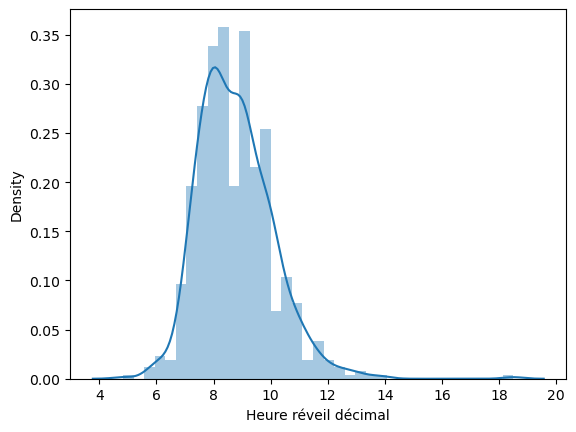

In [4]:
df['Minutes réveil']=df['Heure réveil'].dt.hour * 60 +df['Heure réveil'].dt.minute 
df['Heure réveil décimal']=df['Minutes réveil']/60
sns.distplot(df['Heure réveil décimal'])

<Axes: xlabel='Heure dodo minutes veille', ylabel='Density'>

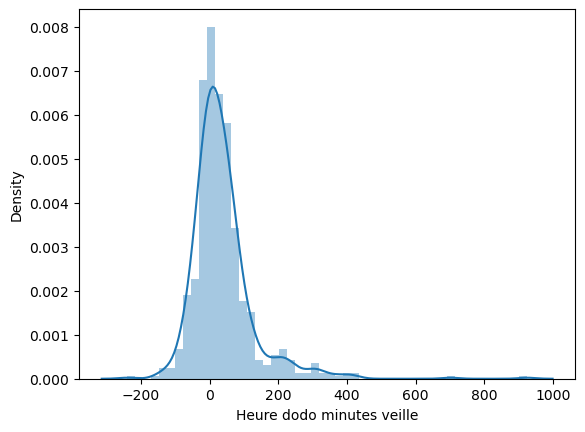

In [5]:
df['Heure dodo minutes']=df['Heure dodo'].dt.hour * 60 + df['Heure dodo'].dt.minute
df['Heure dodo minutes']=df['Heure dodo minutes'].map(lambda x:x-1440 if (x<1440) & (x>=1020) else x)
df['Heure dodo minutes veille']=df['Heure dodo minutes'].shift(1)
sns.distplot(df['Heure dodo minutes veille'])

In [6]:
df['Minutes lever']=df['Heure lever'].dt.hour * 60 +df['Heure lever'].dt.minute 
df['Heure lever décimal']=df['Minutes lever']/60

In [7]:
df['Durée journée après lever']=(df['Heure dodo minutes']+1440-df['Minutes lever'])/60
df['Durée journée après lever et en ôtant sieste']=(df['Heure dodo minutes']+1440-df['Minutes lever']-df['Sieste'])/60

<Axes: xlabel='Durée journée après lever et en ôtant sieste', ylabel='Density'>

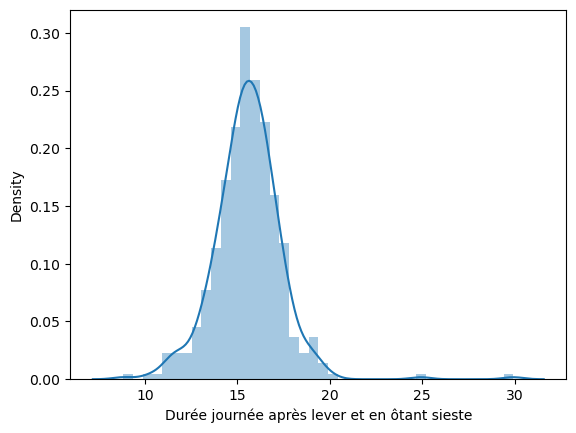

In [8]:
sns.distplot(df['Durée journée après lever et en ôtant sieste'])

In [9]:
df['Total sommeil montre veille']=((df['Sommeil profond']+df['Sommeil léger']+df['Sommeil paradoxal'])/60).shift(1)

df['Temps sommeil théorique']=(df['Minutes réveil']-df['Heure dodo minutes veille'])/60
df['Temps sommeil théorique veille']=df['Temps sommeil théorique'].shift(1)
ecart_sommeil_theorique_reel=(df['Temps sommeil théorique veille']-df['Total sommeil montre veille']).median()

df.loc[df['Total sommeil montre veille'].isna(), 'Total sommeil montre veille'] = \
    df['Temps sommeil théorique veille'] - ecart_sommeil_theorique_reel

df['Total sommeil montre J-2']=(df['Total sommeil montre veille']).shift(2)
df['Total sommeil montre J-3']=(df['Total sommeil montre veille']).shift(3)
df['Total sommeil montre 3 derniers jours']=df['Total sommeil montre veille']+df['Total sommeil montre J-2']+df['Total sommeil montre J-3']

In [10]:
def total_sommeil_avec_sieste(df, shift_n):
    sommeil = (df['Total sommeil montre veille']).shift(shift_n)
    sieste = (df['Sieste'] / 60).shift(shift_n)
    return sommeil + sieste

df['Total sommeil montre veille avec sieste'] = total_sommeil_avec_sieste(df, 1)
df['Total sommeil montre J-2 avec sieste'] = total_sommeil_avec_sieste(df, 2)
df['Total sommeil montre J-3 avec sieste'] = total_sommeil_avec_sieste(df, 3)
df['Total sommeil montre 3 derniers jours avec sieste']=df['Total sommeil montre veille avec sieste']+df['Total sommeil montre J-2 avec sieste']+df['Total sommeil montre J-3 avec sieste']

<Axes: xlabel='Total sommeil montre 3 derniers jours', ylabel='Density'>

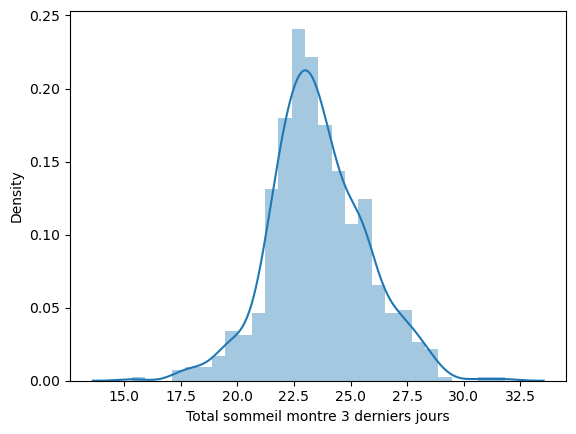

In [11]:
sns.distplot(df['Total sommeil montre 3 derniers jours'])

<Axes: xlabel='Total sommeil montre 3 derniers jours avec sieste', ylabel='Density'>

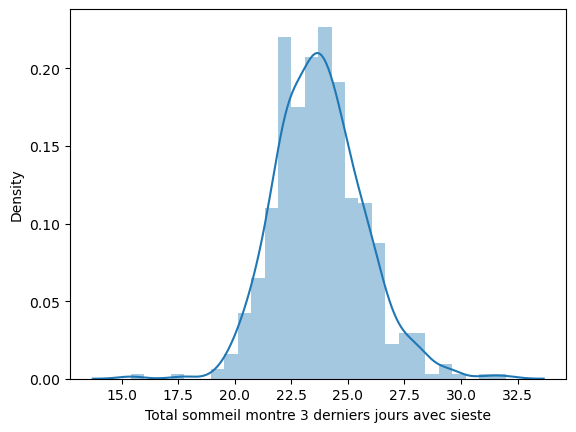

In [12]:
sns.distplot(df['Total sommeil montre 3 derniers jours avec sieste'])

In [13]:
df['Total sommeil montre 3 derniers jours'].mean()

23.561532951289394

In [14]:
df['Total sommeil montre 3 derniers jours avec sieste'].mean()

23.76129238643634

#### Nombre pas

In [16]:
df['Nb pas sport'] = (df['Footing'] * 1000 / df['Longueur foulée']).where(df['Footing'] > 0, None)
df.loc[df['Sport']=='Foot', 'Nb pas sport'] = 6300
df.loc[df.index=='2024-10-09', 'Nb pas sport']=3000
df.loc[df.index=='2024-10-23', 'Nb pas sport']=3000
df.loc[df.index=='2025-01-29', 'Nb pas sport']=3000
df.loc[df.index=='2025-05-10', 'Nb pas sport']=3000
df['Nb pas en enlevant le sport']=df['Nombre de pas']-df['Nb pas sport']
df['Nb pas en enlevant le sport'] = df['Nb pas en enlevant le sport'].fillna(df['Nombre de pas'])

#### Gestion sommeil manquant

In [18]:
'''cols_montre=['Heure réveil décimal','Temps lever','Heure dodo minutes veille','Durée journée après lever et en ôtant sieste',
             'Durée journée après lever','Total sommeil montre veille','Total sommeil montre veille avec sieste','Sieste',
             'Total sommeil montre 3 derniers jours','Total sommeil montre 3 derniers jours avec sieste','Forme','Sucre num','Alimentation num',
             'BPM max','Nombre de pas','Nb pas en enlevant le sport']'''

"cols_montre=['Heure réveil décimal','Temps lever','Heure dodo minutes veille','Durée journée après lever et en ôtant sieste',\n             'Durée journée après lever','Total sommeil montre veille','Total sommeil montre veille avec sieste','Sieste',\n             'Total sommeil montre 3 derniers jours','Total sommeil montre 3 derniers jours avec sieste','Forme','Sucre num','Alimentation num',\n             'BPM max','Nombre de pas','Nb pas en enlevant le sport']"

In [33]:
cols_montre=['Heure réveil décimal','Temps lever','Heure dodo minutes veille','Durée journée après lever et en ôtant sieste',
             'Total sommeil montre veille avec sieste','Sieste',
             'Total sommeil montre 3 derniers jours avec sieste','Forme',
             'Nombre de pas','Nb pas en enlevant le sport']

In [35]:
for col in cols_presque_binaires:
    moyenne_na=1-df[col].isna().mean()
    print(f"{col} : {moyenne_na:.2f}")

Copains : 1.00
Activité? : 1.00
Transport? : 1.00
Match de sport? : 1.00
Footing? : 1.00


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#cols_continues=['Somme réseaux','Travail','Lecture']
cols_continues=['Somme réseaux','Lecture','Travail','Météo num']+cols_montre
df_cont=df[cols_continues]
df_cont_standardise=pd.DataFrame(data=scaler.fit_transform(df_cont[cols_continues]),index=df_cont.index,columns=df_cont.columns)

In [37]:
cols_binaires_ML=["A l'étranger",'Parents',
 'Eugé',
 'Sport',
 'Ciné',
 'Film',
 'Docu',
 'Restau',
 'Fast food',
 'Café/bar solo',
 'Lecture dehors',
 'Café/bar avec copains',
 'Repas copains',
 'Vois copains',
 'Soirée chill',
 'Soirée',
 'Dodo avec Eugé',
'Messe']

cols_presque_binaires_ML=['Copains','Activité?','Transport?','Match de sport?','Footing?']

cols_bases=['Jour semaine','Note','Type']

df_ML=df[cols_bases+cols_binaires_ML+cols_presque_binaires_ML]
df_ML=pd.merge(df_ML,df_cont_standardise,left_index=True,right_index=True)
#df_ML=df_ML.iloc[:-1,:]
df_ML

,Jour semaine,Note,Type,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,...,Heure réveil décimal,Temps lever,Heure dodo minutes veille,Durée journée après lever et en ôtant sieste,Total sommeil montre veille avec sieste,Sieste,Total sommeil montre 3 derniers jours avec sieste,Forme,Nombre de pas,Nb pas en enlevant le sport
Jour,,,,,,,,,,,,,,,,,,,,,
2023-04-12,mercredi,6.0,Cours,0,0.0,1.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-13,jeudi,5.0,Cours,0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-14,vendredi,5.5,Cours/Week-end,0,0.0,1.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-15,samedi,8.5,Week-end,0,0.0,1.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,dimanche,8.5,Week-end,0,0.0,1.0,1,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-19,jeudi,7.5,Mission Sciencéthic,1,0.0,1.0,0,0.0,0.0,0.0,...,-1.033364,-0.816765,0.515223,1.571128,0.575860,-0.536232,-0.296457,-0.481363,1.846837,2.410980
2025-06-20,vendredi,6.0,Mission Sciencéthic,1,0.0,1.0,0,0.0,0.0,0.0,...,1.072450,-0.403500,0.810423,-0.704620,-1.881027,0.115976,-0.817944,-1.297347,0.625083,1.137864
2025-06-21,samedi,7.5,Week-end,1,0.0,1.0,0,0.0,0.0,0.0,...,1.389591,-0.775439,0.165355,1.197906,0.133315,0.985586,-0.655514,0.878610,3.427777,4.058381


In [38]:
df_ML=df_ML[(df_ML.index >='2024-06-22')]
df_ML

,Jour semaine,Note,Type,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,...,Heure réveil décimal,Temps lever,Heure dodo minutes veille,Durée journée après lever et en ôtant sieste,Total sommeil montre veille avec sieste,Sieste,Total sommeil montre 3 derniers jours avec sieste,Forme,Nombre de pas,Nb pas en enlevant le sport
Jour,,,,,,,,,,,,,,,,,,,,,
2024-06-22,samedi,6.0,Week-end,0,0.0,0.0,0,0.0,0.0,0.0,...,1.186620,0.836294,1.783491,-1.988141,-0.950157,3.811821,-1.125707,-2.521323,-1.034861,-0.591861
2024-06-23,dimanche,8.0,Week-end,0,0.0,0.0,0,0.0,0.0,0.0,...,-0.462511,2.489354,-0.020512,-0.622693,1.109966,-0.536232,-0.057086,1.558597,1.614896,2.169289
2024-06-24,lundi,7.0,Stage,0,0.0,0.0,1,0.0,0.0,0.0,...,-0.779652,0.381703,-0.457846,-0.021895,0.270656,-0.536232,0.242128,-1.025352,0.092160,0.194384
2024-06-25,mardi,8.0,Stage,0,0.0,0.0,0,0.0,0.0,0.0,...,-0.335655,-0.816765,-0.567179,0.970331,-0.477092,-0.536232,0.507146,1.558597,-1.037657,-0.594775
2024-06-26,mercredi,8.0,Stage,0,0.0,0.0,0,0.0,0.0,0.0,...,-0.589367,-0.403500,0.690156,0.151062,0.377478,-0.536232,0.096795,-1.025352,0.683461,1.198697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-19,jeudi,7.5,Mission Sciencéthic,1,0.0,1.0,0,0.0,0.0,0.0,...,-1.033364,-0.816765,0.515223,1.571128,0.575860,-0.536232,-0.296457,-0.481363,1.846837,2.410980
2025-06-20,vendredi,6.0,Mission Sciencéthic,1,0.0,1.0,0,0.0,0.0,0.0,...,1.072450,-0.403500,0.810423,-0.704620,-1.881027,0.115976,-0.817944,-1.297347,0.625083,1.137864
2025-06-21,samedi,7.5,Week-end,1,0.0,1.0,0,0.0,0.0,0.0,...,1.389591,-0.775439,0.165355,1.197906,0.133315,0.985586,-0.655514,0.878610,3.427777,4.058381


<Axes: ylabel='Jour'>

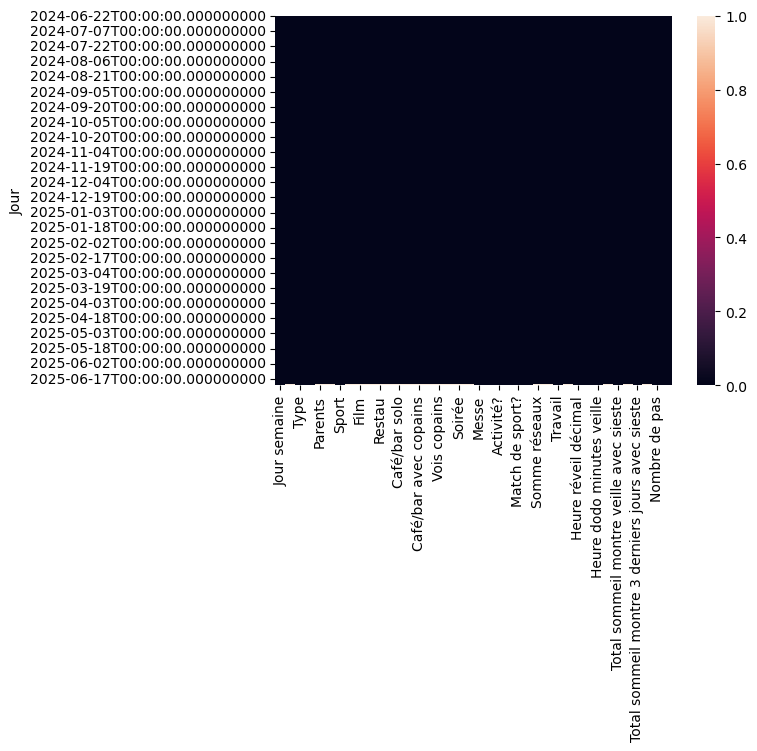

In [39]:
sns.heatmap(df_ML.isna())

In [40]:
for col in df_ML.isna():
    moyenne_na=1-df_ML[col].isna().mean()
    print(f"{col} : {moyenne_na:.2f}")

Jour semaine : 1.00
Note : 1.00
Type : 1.00
A l'étranger : 1.00
Parents : 1.00
Eugé : 1.00
Sport : 1.00
Ciné : 1.00
Film : 1.00
Docu : 1.00
Restau : 1.00
Fast food : 1.00
Café/bar solo : 1.00
Lecture dehors : 1.00
Café/bar avec copains : 1.00
Repas copains : 1.00
Vois copains : 1.00
Soirée chill : 1.00
Soirée : 1.00
Dodo avec Eugé : 1.00
Messe : 1.00
Copains : 1.00
Activité? : 1.00
Transport? : 1.00
Match de sport? : 1.00
Footing? : 1.00
Somme réseaux : 1.00
Lecture : 1.00
Travail : 1.00
Météo num : 1.00
Heure réveil décimal : 1.00
Temps lever : 1.00
Heure dodo minutes veille : 1.00
Durée journée après lever et en ôtant sieste : 1.00
Total sommeil montre veille avec sieste : 1.00
Sieste : 1.00
Total sommeil montre 3 derniers jours avec sieste : 1.00
Forme : 1.00
Nombre de pas : 1.00
Nb pas en enlevant le sport : 1.00


In [41]:
df_ML['Nb pas en enlevant le sport']

Jour
2024-06-22   -0.591861
2024-06-23    2.169289
2024-06-24    0.194384
2024-06-25   -0.594775
2024-06-26    1.198697
                ...   
2025-06-19    2.410980
2025-06-20    1.137864
2025-06-21    4.058381
2025-06-22    1.797007
2025-06-23   -1.682115
Name: Nb pas en enlevant le sport, Length: 367, dtype: float64

In [42]:
df_ML = pd.get_dummies(df_ML, columns=['Jour semaine', 'Type'])
df_ML.dropna(inplace=True)

<Axes: ylabel='Jour'>

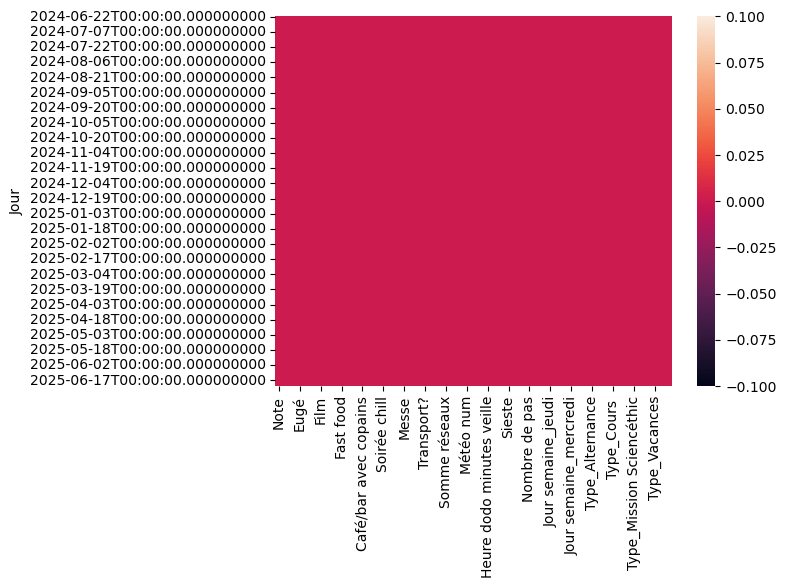

In [43]:
sns.heatmap(df_ML.isna())

In [44]:
df_ML

,Note,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,Restau,Fast food,...,Type_Cours,Type_Cours,Type_Cours/Week-end,Type_Jour férié,Type_Mission Sciencéthic,Type_Stage,Type_Stage/Week-end,Type_Vacances,Type_Week-end,Type_Week-end/Stage
Jour,,,,,,,,,,,,,,,,,,,,,
2024-06-22,6.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2024-06-23,8.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2024-06-24,7.0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2024-06-25,8.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2024-06-26,8.0,0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18,6.5,1,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,True,False,False,False,False,False
2025-06-19,7.5,1,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2025-06-20,6.0,1,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

dict_models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=0),
    'XGBoost Regressor': XGBRegressor(random_state=0)
}

In [46]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    report = {
        'MAE': mae.round(2),
        'MedAE': medae.round(2),
        'RMSE': rmse.round(2),
        'R²': r2.round(2)
    }

    for metric, value in report.items():
        print(f'{metric}: {value}')

In [47]:
from sklearn.model_selection import train_test_split

X=df_ML.drop('Note',axis=1)
y=df_ML['Note']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=77)

In [48]:
from sklearn.model_selection import learning_curve, KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=77)
def evaluation(dict_models,fold):
    for model in dict_models.values():
        plt.figure()
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               train_sizes=np.linspace(0.1, 1, 10), cv=kfold, scoring='r2')
        print(model)
        regression_report(y_test,y_pred)
        plt.title(model)
        plt.plot(N, train_score.mean(axis=1), label='train')
        plt.plot(N, val_score.mean(axis=1), label='validation')
        plt.xlabel('Taille du train set')
        plt.ylabel('Score R²')
        plt.ylim(0,1.01)
        plt.legend()
        plt.show()

In [49]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 31
[LightGBM] [Info] Start training from score 6.845890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

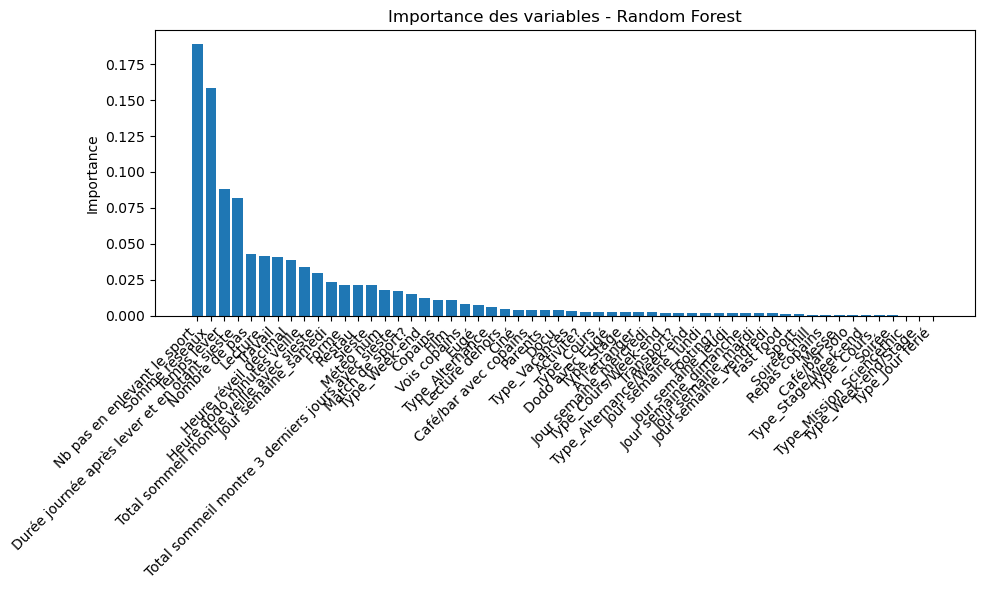

In [50]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

# Récupération des importances
importances = rf.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Tri par importance décroissante
indices = np.argsort(importances)[::-1]

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.title("Importance des variables - Random Forest")
plt.tight_layout()
plt.show()

In [51]:
dfi=pd.DataFrame(importances,features)
dfi.sort_values(0,ascending=False).head(20)

,0
Nb pas en enlevant le sport,0.19
Somme réseaux,0.16
Temps lever,0.09
Durée journée après lever et en ôtant sieste,0.08
Nombre de pas,0.04
Lecture,0.04
Travail,0.04
Heure réveil décimal,0.04
Heure dodo minutes veille,0.03
Total sommeil montre veille avec sieste,0.03


LinearRegression()
MAE: 0.48
MedAE: 0.32
RMSE: 0.66
R²: 0.12


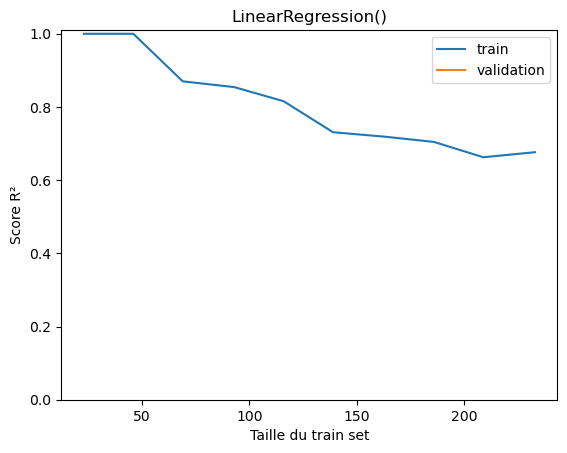

Lasso()
MAE: 0.55
MedAE: 0.35
RMSE: 0.7
R²: -0.0


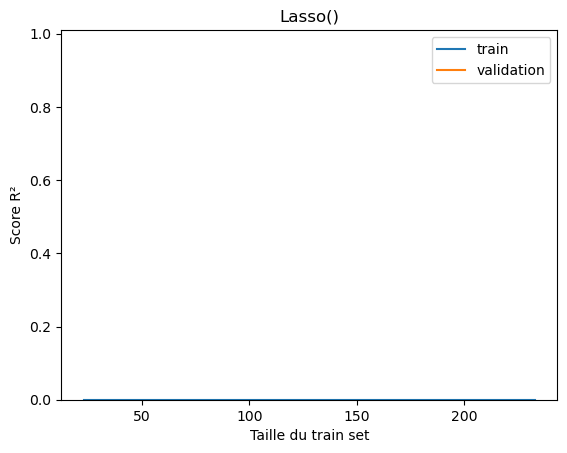

Ridge()
MAE: 0.46
MedAE: 0.34
RMSE: 0.63
R²: 0.2


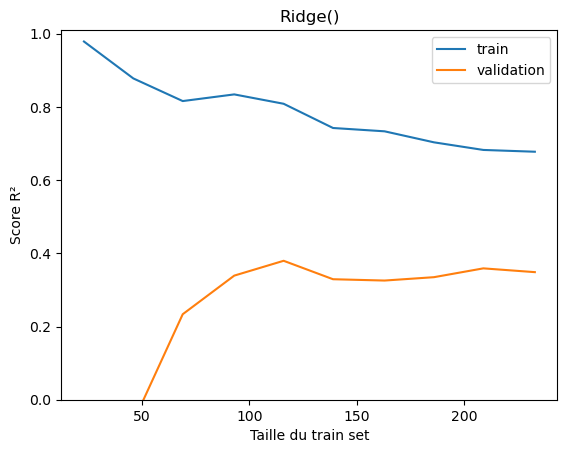

KNeighborsRegressor()
MAE: 0.5
MedAE: 0.45
RMSE: 0.59
R²: 0.29


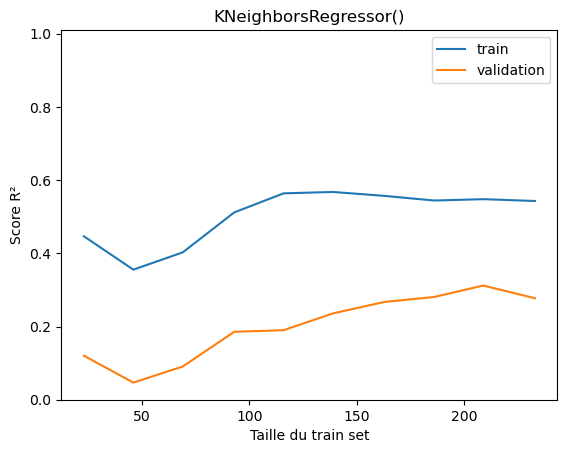

DecisionTreeRegressor(random_state=0)
MAE: 0.63
MedAE: 0.5
RMSE: 1.04
R²: -1.2


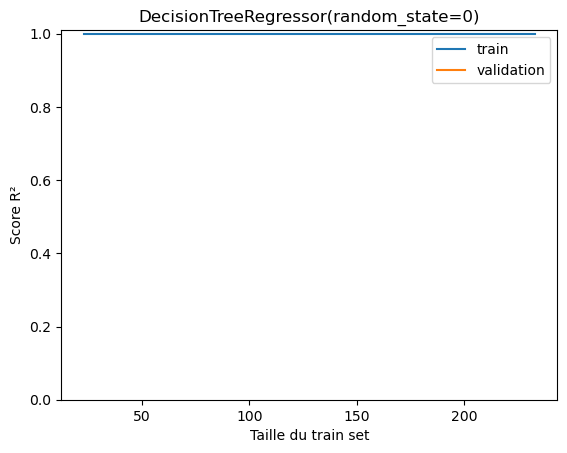

RandomForestRegressor(random_state=0)
MAE: 0.47
MedAE: 0.42
RMSE: 0.62
R²: 0.21


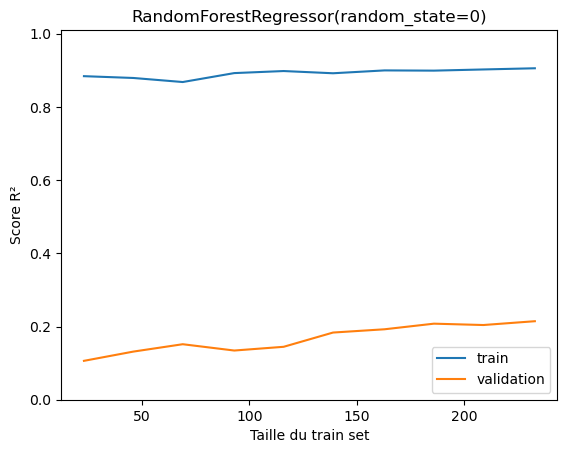

AdaBoostRegressor(random_state=0)
MAE: 0.47
MedAE: 0.36
RMSE: 0.6
R²: 0.28


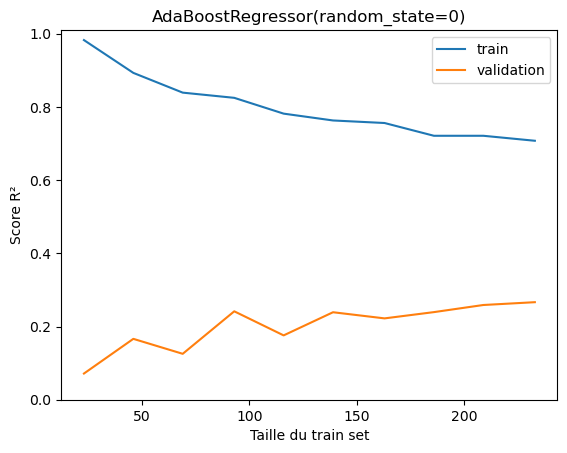

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)
MAE: 0.5
MedAE: 0.4
RMSE: 0.63
R²: 0.18


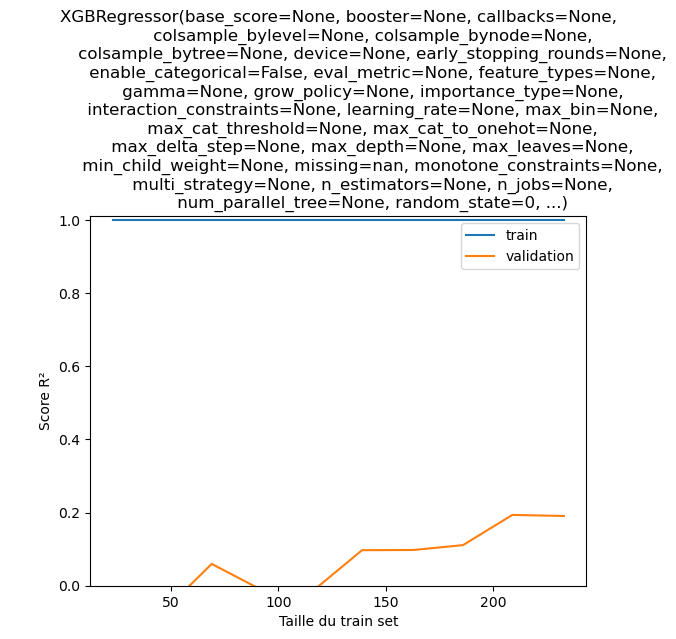

In [52]:
evaluation(dict_models,kfold)

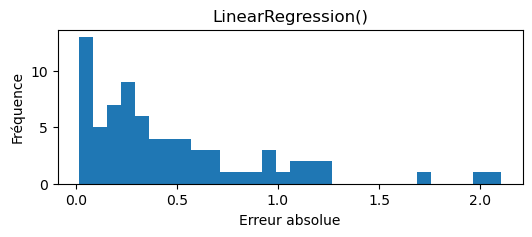

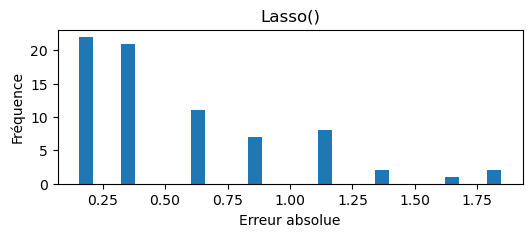

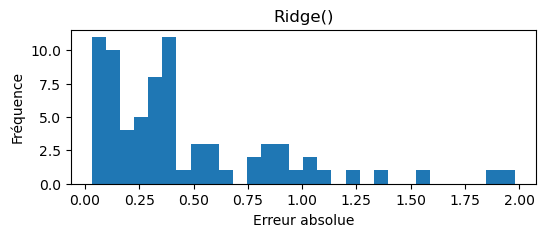

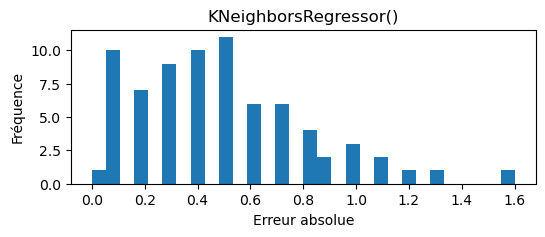

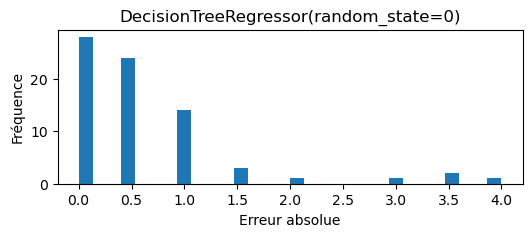

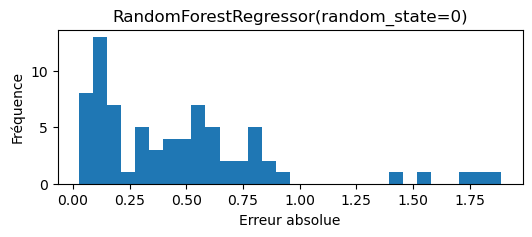

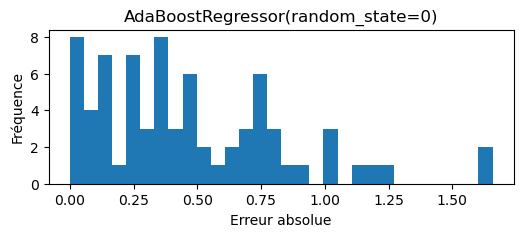

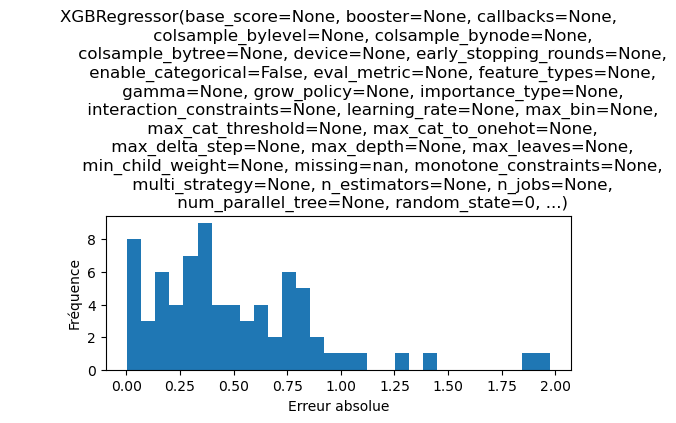

In [53]:
for model in dict_models.values():
    model.fit(X_train,y_train)
    plt.figure(figsize=(6,2))
    y_pred = model.predict(X_test)
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=30)
    plt.xlabel('Erreur absolue')
    plt.ylabel('Fréquence')
    plt.title(f"{model}")
    plt.show()

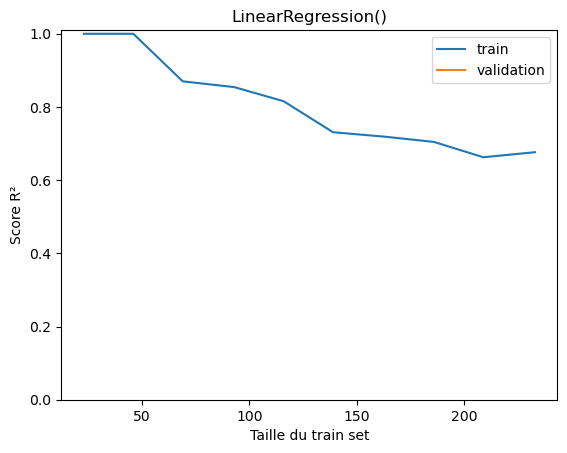

LinearRegression()
MAE: 0.48
MedAE: 0.32
RMSE: 0.66
R²: 0.12


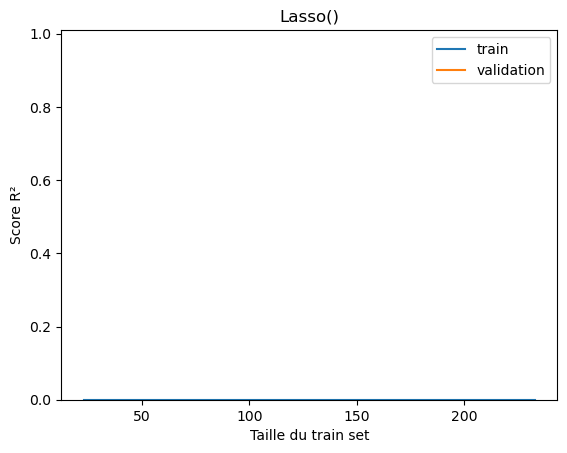

Lasso()
MAE: 0.55
MedAE: 0.35
RMSE: 0.7
R²: -0.0


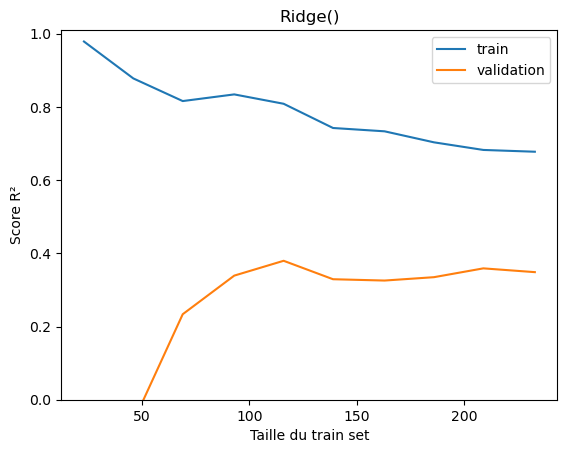

Ridge()
MAE: 0.46
MedAE: 0.34
RMSE: 0.63
R²: 0.2


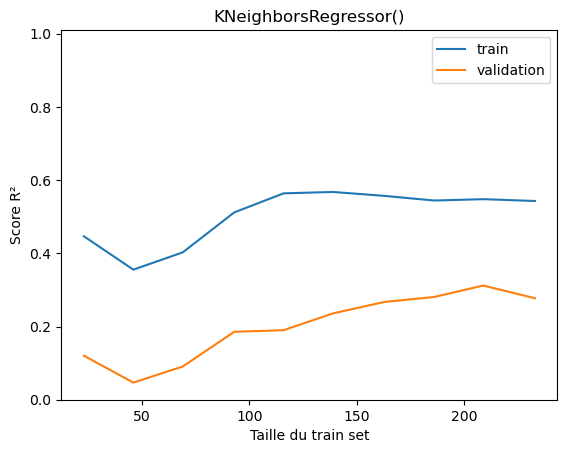

KNeighborsRegressor()
MAE: 0.5
MedAE: 0.45
RMSE: 0.59
R²: 0.29


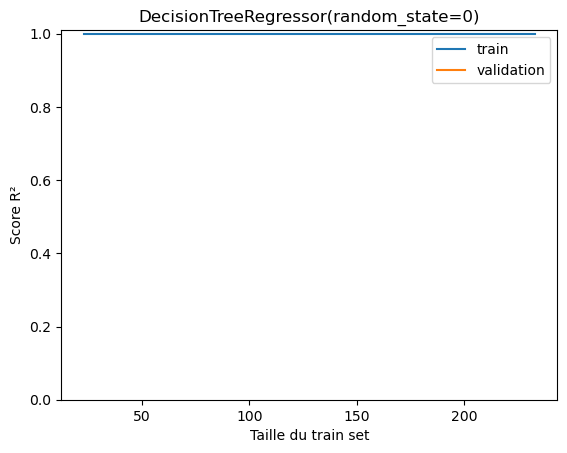

DecisionTreeRegressor(random_state=0)
MAE: 0.63
MedAE: 0.5
RMSE: 1.04
R²: -1.2


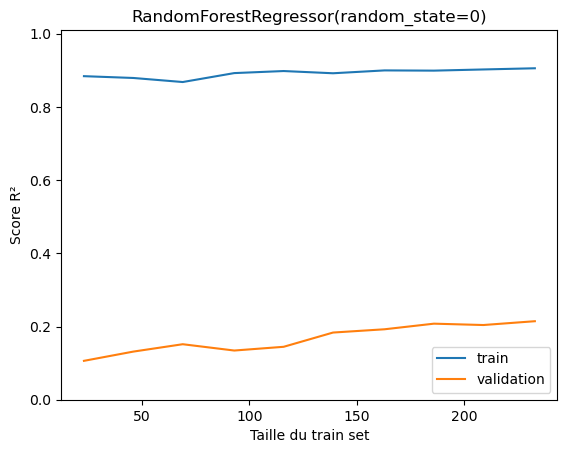

RandomForestRegressor(random_state=0)
MAE: 0.47
MedAE: 0.42
RMSE: 0.62
R²: 0.21


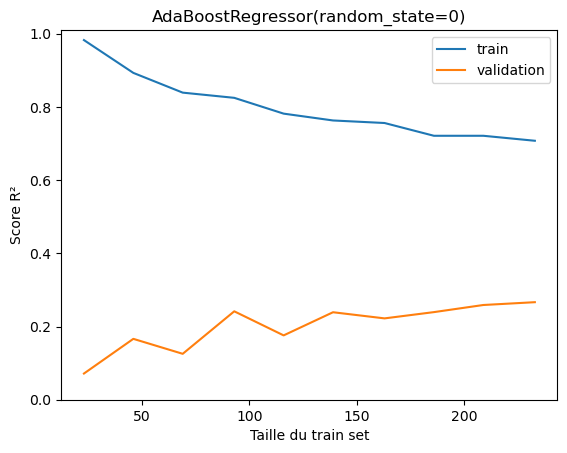

AdaBoostRegressor(random_state=0)
MAE: 0.47
MedAE: 0.36
RMSE: 0.6
R²: 0.28


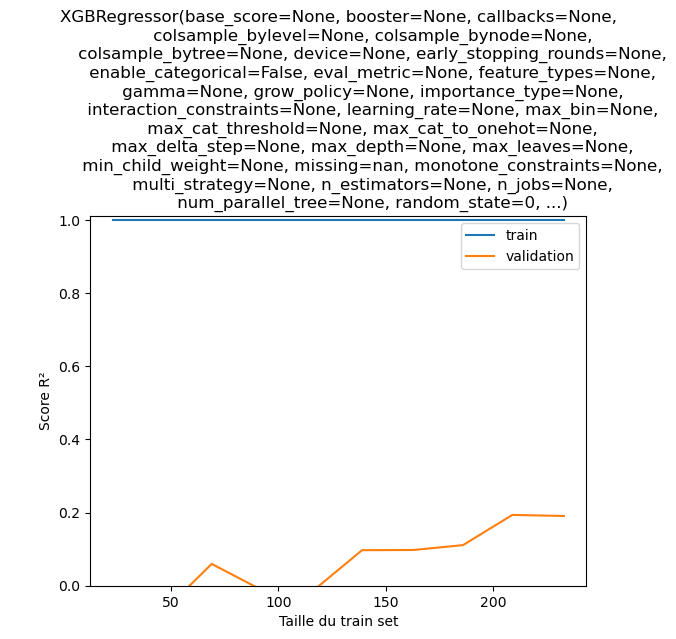

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)
MAE: 0.5
MedAE: 0.4
RMSE: 0.63
R²: 0.18


In [54]:
for model in dict_models.values():
    # 1. Courbe d'apprentissage sur X_train (avec CV interne)
    N, train_score, val_score = learning_curve(
        model, X_train, y_train,
        train_sizes=np.linspace(0.1, 1, 10),
        cv=kfold, scoring='r2'
    )
    
    plt.figure()
    plt.title(model)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('Taille du train set')
    plt.ylabel('Score R²')
    plt.ylim(0, 1.01)
    plt.legend()
    plt.show()

    # 2. Fit final
    model.fit(X_train, y_train)

    # 3. Prédictions sur test + rapport
    y_pred = model.predict(X_test)
    print(model)
    regression_report(y_test, y_pred)


In [55]:
erreur=((y_test-y_pred)**2).sum()

In [56]:
variance=((y_test-y_test.mean())**2).sum()
variance

36.5304054054054

In [57]:
y_test.mean()

6.871621621621622